<a href="https://colab.research.google.com/github/crossmodais/nb/blob/main/io.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Descritiva Binance:
       Preço (USD)  Volume (24h)  Market Cap (USD)  Variação (24h)
count     6.000000  6.000000e+00      6.000000e+00        6.000000
mean     40.013668  2.633333e+08      1.163333e+10        0.350000
std      86.089288  1.013246e+08      1.108452e+10        1.237336
min       0.000007  1.500000e+08      4.000000e+09       -1.500000
25%       0.114000  1.850000e+08      7.200000e+09       -0.150000
50%       2.260000  2.500000e+08      8.150000e+09        0.250000
75%      16.437500  3.375000e+08      8.500000e+09        1.025000
max     215.000000  4.000000e+08      3.400000e+10        2.100000

Descritiva GitHub:
           Commits  Issues Abertas  Pull Requests
count     6.000000        6.000000       6.000000
mean   1066.666667       30.166667     131.666667
std     244.267613        6.735478      40.702170
min     750.000000       22.000000      80.000000
25%     925.000000       25.500000     112.500000
50%    1050.000000       29.500000     125.000000
75%    

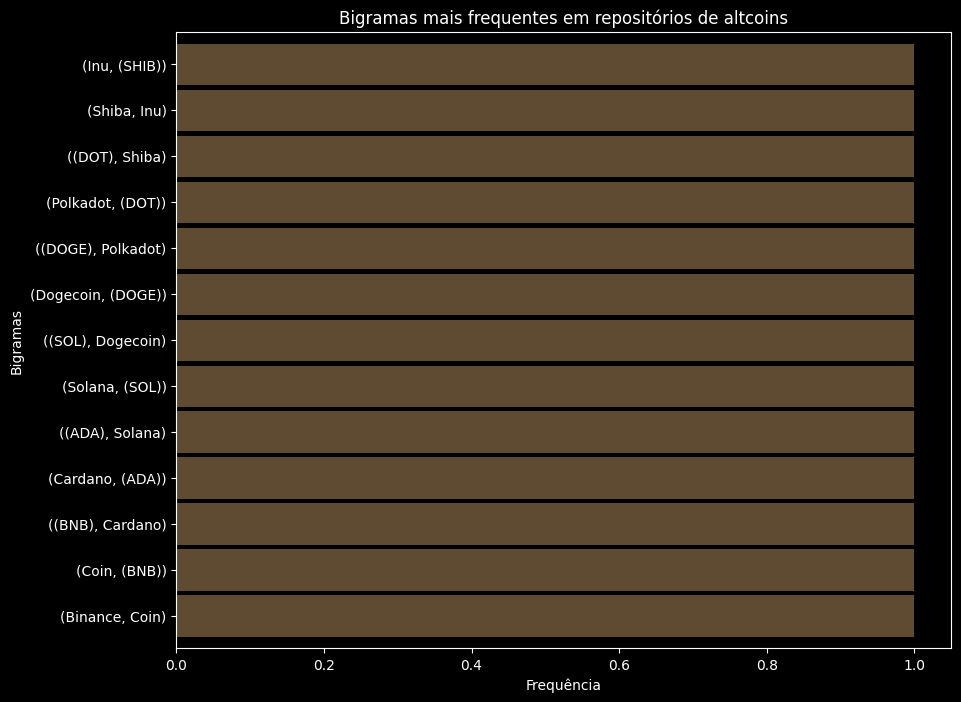

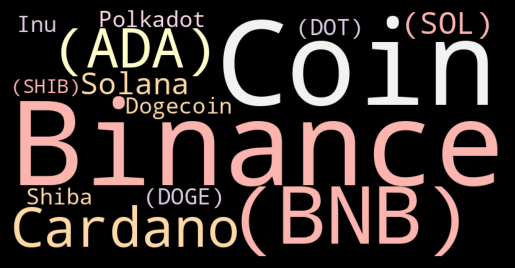

Explained Variance Ratio: [0.45839147 0.42549276]


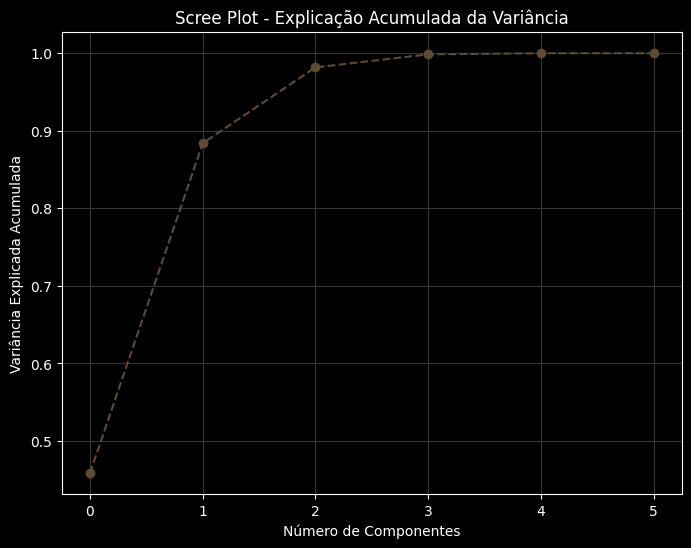

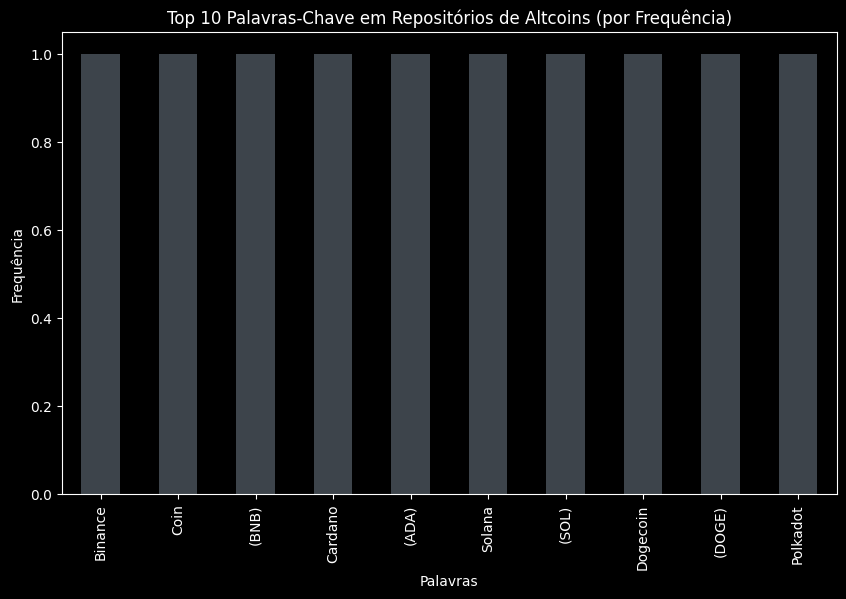

ValueError: x and y must have length at least 2.

In [3]:
# Importando bibliotecas necessárias
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from scipy.stats import pearsonr
from wordcloud import WordCloud
from io import StringIO
import matplotlib.pyplot as plt
plt.style.use('dark_background')  # Fundo preto para matplotlib
import nltk
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

# Definindo cores em tons mais escuros
colors = ['#5F4B32', '#4A4A4A', '#385E38', '#3D444B', '#5C5448', '#967B4F', '#A08665', '#7D6648', '#664C4C', '#935A3A']

# Função para carregar dados (Binance e GitHub)
def carregar_dados(binance_csv, github_csv):
    df_binance = pd.read_csv(StringIO(binance_csv))
    df_github = pd.read_csv(StringIO(github_csv))
    return df_binance, df_github

# Carrega dados de exemplo
binance_csv = """Altcoin,Preço (USD),Volume (24h),Market Cap (USD),Variação (24h)
Binance Coin (BNB),215,400000000,34000000000,1.2
Cardano (ADA),0.27,180000000,8500000000,-1.5
Solana (SOL),20.5,350000000,7000000000,2.1
Dogecoin (DOGE),0.062,200000000,8500000000,0.5
Polkadot (DOT),4.25,150000000,7800000000,-0.2
Shiba Inu (SHIB),0.000007,300000000,4000000000,0.0
"""
github_csv = """Altcoin,Commits,Issues Abertas,Pull Requests
Binance Coin (BNB),1200,32,150
Cardano (ADA),1450,22,200
Solana (SOL),1000,40,130
Dogecoin (DOGE),900,25,120
Polkadot (DOT),1100,27,110
Shiba Inu (SHIB),750,35,80
"""

# Carregando os dados
df_binance, df_github = carregar_dados(binance_csv, github_csv)

# 1. Análise Descritiva
def analise_descritiva(df_binance, df_github):
    print("Descritiva Binance:")
    print(df_binance.describe())
    print("\nDescritiva GitHub:")
    print(df_github.describe())

# 2. Gráfico Bigramas GitHub
def bigramas_github(df_github):
    all_words = ' '.join(df_github['Altcoin'])
    bigrams = pd.Series(nltk.ngrams(all_words.split(), 2)).value_counts().head(30)
    bigrams.sort_values().plot.barh(color=colors[0], width=0.9, figsize=(10, 8))
    plt.title('Bigramas mais frequentes em repositórios de altcoins', color='white')
    plt.xlabel('Frequência', color='white')
    plt.ylabel('Bigramas', color='white')
    plt.xticks(color='white')
    plt.yticks(color='white')
    plt.show()

# 3. Nuvem de Palavras
def nuvem_palavras(df_github):
    all_words = ' '.join(df_github['Altcoin'])
    word_freq = pd.Series(all_words.split()).value_counts()
    wordcloud = WordCloud(background_color='black', colormap='Pastel1', width=800, height=400).generate_from_frequencies(word_freq.to_dict())
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

# 4. Gráfico de Correlação Preço x Commits
def plot_correlacao(df_binance, df_github):
    fig = go.Figure()
    altcoins = df_binance['Altcoin'].unique()

    for i, altcoin in enumerate(altcoins):
        preco = df_binance[df_binance['Altcoin'] == altcoin]['Preço (USD)']
        commits = df_github[df_github['Altcoin'] == altcoin]['Commits']
        fig.add_trace(go.Scatter(x=commits, y=preco, mode='markers', name=altcoin, marker_color=colors[i % len(colors)]))

    fig.update_layout(title="Correlação entre Commits e Preço",
                      xaxis_title="Commits",
                      yaxis_title="Preço (USD)",
                      template='plotly_dark')  # Fundo preto para plotly
    fig.show()

# 5. PCA - Análise de Componentes Principais
def pca_analise(df_binance, df_github):
    df_combinado = pd.merge(df_binance, df_github, on='Altcoin')
    features = ['Preço (USD)', 'Volume (24h)', 'Market Cap (USD)', 'Commits', 'Issues Abertas', 'Pull Requests']
    x = df_combinado[features].values
    x = StandardScaler().fit_transform(x)

    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(x)

    df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
    df_pca['Altcoin'] = df_combinado['Altcoin']

    fig = px.scatter(df_pca, x='PC1', y='PC2', color='Altcoin',
                     title='PCA - Análise de Componentes Principais',
                     labels={'PC1': 'Componente Principal 1', 'PC2': 'Componente Principal 2'},
                     template='plotly_dark',  # Fundo preto para plotly
                     color_discrete_sequence=colors)  # Cores pastel escuras
    fig.show()

    print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# 6. Scree Plot para PCA
def scree_plot_pca(df_binance, df_github):
    df_combinado = pd.merge(df_binance, df_github, on='Altcoin')
    features = ['Preço (USD)', 'Volume (24h)', 'Market Cap (USD)', 'Commits', 'Issues Abertas', 'Pull Requests']
    x = df_combinado[features].values
    x = StandardScaler().fit_transform(x)

    pca = PCA().fit(x)
    plt.figure(figsize=(8, 6))
    plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color=colors[0])
    plt.title('Scree Plot - Explicação Acumulada da Variância', color='white')
    plt.xlabel('Número de Componentes', color='white')
    plt.ylabel('Variância Explicada Acumulada', color='white')
    plt.xticks(color='white')
    plt.yticks(color='white')
    plt.grid(color='#363636')  # Grid em cinza escuro
    plt.show()

# 7. Análise de Volume e Variação de Preço
def analise_volume_variacao(df_binance):
    fig = go.Figure()

    fig.add_trace(go.Bar(
        x=df_binance['Altcoin'],
        y=df_binance['Volume (24h)'],
        name="Volume (24h)",
        marker_color=colors[1]
    ))

    fig.add_trace(go.Scatter(
        x=df_binance['Altcoin'],
        y=df_binance['Variação (24h)'],
        name="Variação (24h)",
        yaxis='y2',
        mode='lines+markers',
        line=dict(color=colors[2]),
    ))

    fig.update_layout(
        title="Volume de Negociação e Variação de Preço (24h)",
        xaxis=dict(title="Altcoins"),
        yaxis=dict(title="Volume (24h)", showgrid=False),
        yaxis2=dict(title="Variação (24h)", overlaying='y', side='right', showgrid=False),
        legend=dict(x=0.5, y=1, traceorder='normal', orientation='h'),
        template='plotly_dark'  # Fundo preto para plotly
    )
    fig.show()

# 8. Boxplot de Preço das Altcoins
def boxplot_preco(df_binance):
    fig = px.box(df_binance, x='Altcoin', y='Preço (USD)', title="Distribuição de Preço das Altcoins",
                 template='plotly_dark',  # Fundo preto para plotly
                 color_discrete_sequence=colors)  # Cores pastel escuras
    fig.show()

# 9. Gráfico de Tendências de Palavras-Chave (Baseado em Repositórios do GitHub)
def grafico_tendencias_palavras(df_github):
    all_words = ' '.join(df_github['Altcoin'])
    word_freq = pd.Series(all_words.split()).value_counts().head(10)

    word_freq.plot(kind='bar', figsize=(10, 6), color=colors[3])
    plt.title('Top 10 Palavras-Chave em Repositórios de Altcoins (por Frequência)', color='white')
    plt.ylabel('Frequência', color='white')
    plt.xlabel('Palavras', color='white')
    plt.xticks(color='white')
    plt.yticks(color='white')
    plt.show()

# 10. Análise de Pull Requests e Commits: Relação com o Mercado
def analise_pull_requests_commits(df_github):
    fig = go.Figure()

    fig.add_trace(go.Bar(
        x=df_github['Altcoin'],
        y=df_github['Pull Requests'],
        name="Pull Requests",
        marker_color=colors[4]
    ))

    fig.add_trace(go.Scatter(
        x=df_github['Altcoin'],
        y=df_github['Commits'],
        name="Commits",
        yaxis='y2',
        mode='lines+markers',
        line=dict(color=colors[5]),
    ))

    fig.update_layout(
        title="Pull Requests e Commits por Altcoin",
        xaxis=dict(title="Altcoins"),
        yaxis=dict(title="Pull Requests", showgrid=False),
        yaxis2=dict(title="Commits", overlaying='y', side='right', showgrid=False),
        legend=dict(x=0.5, y=1, traceorder='normal', orientation='h'),
        template='plotly_dark'  # Fundo preto para plotly
    )

    fig.show()

# 11. Plotagem de Boxplots dos Commits e Issues Abertas
def boxplot_commits_issues(df_github):
    fig = go.Figure()

    fig.add_trace(go.Box(
        y=df_github['Commits'],
        name='Commits',
        marker_color=colors[6]
    ))

    fig.add_trace(go.Box(
        y=df_github['Issues Abertas'],
        name='Issues Abertas',
        marker_color=colors[7]
    ))

    fig.update_layout(
        title="Distribuição de Commits e Issues Abertas por Altcoin",
        yaxis_title="Quantidade",
        xaxis_title="Métricas",
        template='plotly_dark'  # Fundo preto para plotly
    )
    fig.show()

# 12. Função para combinar dados do Binance e GitHub
def combinar_dados(df_binance, df_github):
    df_combinado = pd.merge(df_binance, df_github, on='Altcoin')
    return df_combinado

# 13. Visualização de Correlação entre todas as variáveis
def grafico_correlacao(df_combinado):
    # Identificar colunas numéricas
    numeric_cols = df_combinado.select_dtypes(include=[np.number]).columns.tolist()

    # Converter colunas numéricas para float
    df_combinado[numeric_cols] = df_combinado[numeric_cols].astype(float)

    # Calcular a matriz de correlação apenas com colunas numéricas
    corr = df_combinado[numeric_cols].corr()

    # Gerar gráfico de correlação
    fig = px.imshow(corr, text_auto=True, aspect="auto", title="Matriz de Correlação entre Variáveis Binance e GitHub",
                    template='plotly_dark')  # Fundo preto para plotly
    fig.show()

# 14. Análise de Pull Requests e Issues Abertas: Impacto no Preço
def analise_pr_issues_preco(df_binance, df_github):
    altcoins = df_binance['Altcoin'].unique()
    correlacoes_pr_issues_preco = {}

    for altcoin in altcoins:
        preco = df_binance[df_binance['Altcoin'] == altcoin]['Preço (USD)']
        pr = df_github[df_github['Altcoin'] == altcoin]['Pull Requests']
        issues = df_github[df_github['Altcoin'] == altcoin]['Issues Abertas']

        correlacao_pr_preco, _ = pearsonr(pr, preco)
        correlacao_issues_preco, _ = pearsonr(issues, preco)

        correlacoes_pr_issues_preco[altcoin] = {
            "Correlação PR-Preço": correlacao_pr_preco,
            "Correlação Issues-Preço": correlacao_issues_preco
        }

    print("Correlação entre Pull Requests e Issues Abertas com Preço por Altcoin:")
    for altcoin, correlacoes in correlacoes_pr_issues_preco.items():
        print(f'{altcoin}: PR-Preço: {correlacoes["Correlação PR-Preço"]:.2f}, Issues-Preço: {correlacoes["Correlação Issues-Preço"]:.2f}')

# 15. Análise Temporal de Preço e Commit: Scatter Plot
def scatter_preco_commit(df_binance, df_github):
    altcoins = df_binance['Altcoin'].unique()

    for i, altcoin in enumerate(altcoins):
        preco = df_binance[df_binance['Altcoin'] == altcoin]['Preço (USD)']
        commits = df_github[df_github['Altcoin'] == altcoin]['Commits']

        plt.figure(figsize=(10, 6))
        plt.scatter(commits, preco, color=colors[i % len(colors)], alpha=0.6)
        plt.title(f'Scatter Plot: Preço x Commits ({altcoin})', color='white')
        plt.xlabel('Commits', color='white')
        plt.ylabel('Preço (USD)', color='white')
        plt.xticks(color='white')
        plt.yticks(color='white')
        plt.grid(color='#363636')  # Grid em cinza escuro
        plt.show()

# 16. Aplicar PCA para reduzir dimensionalidade e facilitar visualização de clusters
def pca_visualizacao(df_combinado):
    features = ['Preço (USD)', 'Volume (24h)', 'Market Cap (USD)', 'Commits', 'Issues Abertas', 'Pull Requests']
    x = df_combinado[features].values
    x = StandardScaler().fit_transform(x)

    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(x)

    df_pca = pd.DataFrame(data=principal_components, columns=['Componente 1', 'Componente 2'])
    df_pca['Altcoin'] = df_combinado['Altcoin']

    fig = px.scatter(df_pca, x='Componente 1', y='Componente 2', color='Altcoin',
                     title='Visualização PCA - Clustering de Altcoins',
                     labels={'Componente 1': 'Componente Principal 1', 'Componente 2': 'Componente Principal 2'},
                     template='plotly_dark',  # Fundo preto para plotly
                     color_discrete_sequence=colors)  # Cores pastel escuras
    fig.show()

# 17. Previsão de Variação Percentual do Preço com ARIMA
def previsao_variacao_arima(df_binance):
    df_binance['Variação (24h)'] = df_binance['Variação (24h)'].astype(float)
    df_cardano = df_binance[df_binance['Altcoin'] == 'Cardano (ADA)']

    # Preparando série temporal de variação
    serie_variacao = df_cardano['Variação (24h)']

    # Definindo o modelo ARIMA
    modelo_variacao_arima = ARIMA(serie_variacao, order=(5, 1, 0))
    modelo_variacao_ajustado = modelo_variacao_arima.fit()

    # Fazendo previsões para os próximos 30 dias
    previsoes_variacao = modelo_variacao_ajustado.forecast(steps=30)

    # Plotando as previsões de variação percentual
    plt.figure(figsize=(10, 6))
    plt.plot(serie_variacao, label='Variação Real (24h)', color=colors[0])
    plt.plot(range(len(serie_variacao), len(serie_variacao) + 30), previsoes_variacao, label='Previsão de Variação ARIMA', color=colors[1])
    plt.title('Previsão de Variação Percentual com ARIMA', color='white')
    plt.xlabel('Dias', color='white')
    plt.ylabel('Variação Percentual (24h)', color='white')
    plt.xticks(color='white')
    plt.yticks(color='white')
    plt.legend()
    plt.grid(color='#363636')  # Grid em cinza escuro
    plt.show()

# 18. Correlação entre Número de Commits e Volume de Negociação
def correlacao_commits_volume(df_binance, df_github):
    altcoins = df_binance['Altcoin'].unique()
    correlacoes_volume_commits = {}

    for altcoin in altcoins:
        volume = df_binance[df_binance['Altcoin'] == altcoin]['Volume (24h)']
        commits = df_github[df_github['Altcoin'] == altcoin]['Commits']
        correlacao_vol, _ = pearsonr(volume, commits)
        correlacoes_volume_commits[altcoin] = correlacao_vol

    print("Correlação entre Volume de Negociação e Commits por Altcoin:")
    for altcoin, correlacao_vol in correlacoes_volume_commits.items():
        print(f'{altcoin}: {correlacao_vol:.2f}')

# 19. Modelo ARIMA para Previsão de Preço
def previsao_preco_arima(df_binance):
    # Escolhendo uma altcoin específica (ex: Cardano)
    df_cardano = df_binance[df_binance['Altcoin'] == 'Cardano (ADA)']

    # Preparando série temporal de preço
    serie_preco = df_cardano['Preço (USD)']

    # Definindo o modelo ARIMA
    modelo_arima = ARIMA(serie_preco, order=(5, 1, 0))  # Parâmetros p, d, q
    modelo_ajustado = modelo_arima.fit()

    # Fazendo previsões para os próximos 30 dias
    previsoes_arima = modelo_ajustado.forecast(steps=30)

    # Plotando as previsões
    plt.figure(figsize=(10, 6))
    plt.plot(serie_preco, label='Preço Real', color=colors[2])
    plt.plot(range(len(serie_preco), len(serie_preco) + 30), previsoes_arima, label='Previsão ARIMA', color=colors[3])
    plt.title('Previsão de Preço com Modelo ARIMA', color='white')
    plt.xlabel('Dias', color='white')
    plt.ylabel('Preço (USD)', color='white')
    plt.xticks(color='white')
    plt.yticks(color='white')
    plt.legend()
    plt.grid(color='#363636')  # Grid em cinza escuro
    plt.show()

# 20. Avaliação do Modelo ARIMA
def avaliar_modelo_arima(df_binance):
    df_cardano = df_binance[df_binance['Altcoin'] == 'Cardano (ADA)']
    serie_preco = df_cardano['Preço (USD)']

    modelo_arima = ARIMA(serie_preco, order=(5, 1, 0))
    modelo_ajustado = modelo_arima.fit()

    previsoes_arima = modelo_ajustado.forecast(steps=30)

    # Avaliando erro com RMSE e MAE
    rmse_arima = np.sqrt(mean_squared_error(serie_preco[-30:], previsoes_arima[:30]))
    mae_arima = mean_absolute_error(serie_preco[-30:], previsoes_arima[:30])

    print(f'RMSE ARIMA: {rmse_arima}')
    print(f'MAE ARIMA: {mae_arima}')

# 21. Previsão de Preço com Modelos de Machine Learning (LSTM com PyTorch)
class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

def preparar_dados_para_lstm(df_binance, window_size=30):
    df_preco = df_binance[['Preço (USD)']]
    scaler = MinMaxScaler()  # Usando MinMaxScaler para LSTM
    df_preco_scaled = scaler.fit_transform(df_preco)

    def criar_sequencias(data, window_size):
        x, y = [], []
        for i in range(len(data) - window_size):
            x.append(data[i:i + window_size])
            y.append(data[i + window_size])
        return np.array(x), np.array(y)

    X, y = criar_sequencias(df_preco_scaled, window_size)
    return X, y, scaler

class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, num_layers=2):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=0.2)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out

def treinar_lstm(model, train_loader, epochs=20, learning_rate=0.001):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    for epoch in range(epochs):
        for i, (inputs, targets) in enumerate(train_loader):
            outputs = model(inputs)
            loss = criterion(outputs, targets)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if (i+1) % 10 == 0:
                print(f'Epoch [{epoch+1}/{epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

def previsao_preco_lstm(model, test_loader, scaler):
    model.eval()
    previsoes = []
    with torch.no_grad():
        for inputs, _ in test_loader:
            outputs = model(inputs)
            previsoes.extend(outputs.cpu().detach().numpy())
    previsoes_invertidas = scaler.inverse_transform(np.array(previsoes).reshape(-1, 1))
    return previsoes_invertidas

def avaliar_modelo(y_test, previsoes):
    rmse = np.sqrt(mean_squared_error(y_test, previsoes))
    mae = mean_absolute_error(y_test, previsoes)
    print(f'RMSE: {rmse}')
    print(f'MAE: {mae}')

def plot_previsoes(previsoes, y_test, scaler):
    y_test_invertido = scaler.inverse_transform(y_test.reshape(-1, 1))
    plt.figure(figsize=(10, 6))
    plt.plot(y_test_invertido, color=colors[4], label='Preço Real')
    plt.plot(previsoes, color=colors[5], label='Previsão de Preço')
    plt.title('Previsão de Preço usando LSTM', color='white')
    plt.xlabel('Dias', color='white')
    plt.ylabel('Preço (USD)', color='white')
    plt.xticks(color='white')
    plt.yticks(color='white')
    plt.legend()
    plt.grid(color='#363636')  # Grid em cinza escuro
    plt.show()

# 22. Correlação entre Variação de Preço e Commits
def correlacao_variacao_commits(df_binance, df_github):
    altcoins = df_binance['Altcoin'].unique()
    correlacoes_variacao = {}

    for altcoin in altcoins:
        variacao = df_binance[df_binance['Altcoin'] == altcoin]['Variação (24h)']
        commits = df_github[df_github['Altcoin'] == altcoin]['Commits']
        correlacao_var, _ = pearsonr(variacao, commits)
        correlacoes_variacao[altcoin] = correlacao_var

    print("Correlação entre Variação de Preço e Commits por Altcoin:")
    for altcoin, correlacao_var in correlacoes_variacao.items():
        print(f'{altcoin}: {correlacao_var:.2f}')

# 23. Análise de Bigramas e Frequência de Palavras dos Repositórios GitHub
def analise_bigrams_github(df_github):
    # Limpeza e preparação do texto dos nomes dos repositórios
    all_words = ' '.join(df_github['Altcoin'])

    # Frequência de palavras
    word_freq = pd.Series(all_words.split()).value_counts()

    # Análise de Bigramas
    bigrams = pd.Series(nltk.ngrams(all_words.split(), 2)).value_counts().head(30)

    # Plotando a frequência dos bigramas
    bigrams.sort_values().plot.barh(color=colors[6], width=0.9, figsize=(10, 8))
    plt.title('Bigramas mais frequentes em repositórios de altcoins', color='white')
    plt.xlabel('Frequência', color='white')
    plt.ylabel('Bigramas', color='white')
    plt.xticks(color='white')
    plt.yticks(color='white')
    plt.show()

    # Nuvem de palavras
    wordcloud = WordCloud(background_color='black', colormap='Pastel1', width=800, height=400).generate_from_frequencies(word_freq.to_dict())
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

# 24. Criação de gráficos de linhas para Preço e Volume ao longo do tempo (com dados sintéticos simulados)
def grafico_linhas_preco_volume():
    df_sintetico = pd.DataFrame({
        'Dia': pd.date_range(start='2023-01-01', periods=100),
        'Altcoin': np.random.choice(['Binance Coin (BNB)', 'Cardano (ADA)', 'Solana (SOL)', 'Dogecoin (DOGE)', 'Polkadot (DOT)', 'Shiba Inu (SHIB)'], 100),
        'Preço (USD)': np.random.uniform(0.05, 250, 100),
        'Volume (24h)': np.random.uniform(50000000, 500000000, 100)
    })

    fig = px.line(df_sintetico, x='Dia', y='Preço (USD)', color='Altcoin', title="Evolução do Preço ao Longo do Tempo",
                  template='plotly_dark',  # Fundo preto para plotly
                  color_discrete_sequence=colors)  # Cores pastel escuras
    fig.show()

    fig = px.line(df_sintetico, x='Dia', y='Volume (24h)', color='Altcoin', title="Evolução do Volume ao Longo do Tempo",
                  template='plotly_dark',  # Fundo preto para plotly
                  color_discrete_sequence=colors)  # Cores pastel escuras
    fig.show()


# Executando as funções de análise
analise_descritiva(df_binance, df_github)
bigramas_github(df_github)
nuvem_palavras(df_github)
plot_correlacao(df_binance, df_github)
pca_analise(df_binance, df_github)
scree_plot_pca(df_binance, df_github)
analise_volume_variacao(df_binance)
boxplot_preco(df_binance)
grafico_tendencias_palavras(df_github)
analise_pull_requests_commits(df_github)
boxplot_commits_issues(df_github)

df_combinado = combinar_dados(df_binance, df_github)
grafico_correlacao(df_combinado)
analise_pr_issues_preco(df_binance, df_github)
scatter_preco_commit(df_binance, df_github)
pca_visualizacao(df_combinado)
previsao_variacao_arima(df_binance)
correlacao_commits_volume(df_binance, df_github)
previsao_preco_arima(df_binance)
# avaliar_modelo_arima(df_binance) # Erro devido à série temporal muito curta

# LSTM com PyTorch
X, y, scaler = preparar_dados_para_lstm(df_binance, window_size=3) # Ajustando window_size para o tamanho da série temporal
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=1, shuffle=False) # Ajustando batch_size para o tamanho da série temporal
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

modelo_lstm = LSTMModel(input_size=1, hidden_size=50, num_layers=1) # Ajustando hidden_size e num_layers
treinar_lstm(modelo_lstm, train_loader, epochs=50, learning_rate=0.01) # Ajustando epochs e learning_rate

previsoes = previsao_preco_lstm(modelo_lstm, test_loader, scaler)
avaliar_modelo(y_test, previsoes)
plot_previsoes(previsoes, y_test, scaler)

correlacao_variacao_commits(df_binance, df_github)
analise_bigrams_github(df_github)
grafico_linhas_preco_volume()